✅ 正在读取数据...
📊 合并后总样本数：1687
📋 原始列名： ['序号', '孕妇代码', '年龄', '身高', '体重', '末次月经', 'IVF妊娠', '检测日期', '检测抽血次数', '检测孕周', '孕妇BMI', '原始读段数', '在参考基因组上比对的比例', '重复读段的比例', '唯一比对的读段数  ', 'GC含量', '13号染色体的Z值', '18号染色体的Z值', '21号染色体的Z值', 'X染色体的Z值', 'Y染色体的Z值', 'Y染色体浓度', 'X染色体浓度', '13号染色体的GC含量', '18号染色体的GC含量', '21号染色体的GC含量', '被过滤掉读段数的比例', '染色体的非整倍体', '怀孕次数', '生产次数', '胎儿是否健康', '唯一比对的读段数']
🔍 BMI验证：最大差异 = 0.0022

🔍 正在筛选男胎样本（Y染色体浓度非空且 > 0）...
✅ 男胎样本数量：1082

🧹 数据清洗：剔除GC含量异常、测序深度过低样本...
✅ 清洗后男胎样本数：925
💾 清洗后数据已保存至：C1_Output/clean_male_data.csv

📈 开始探索性数据分析...


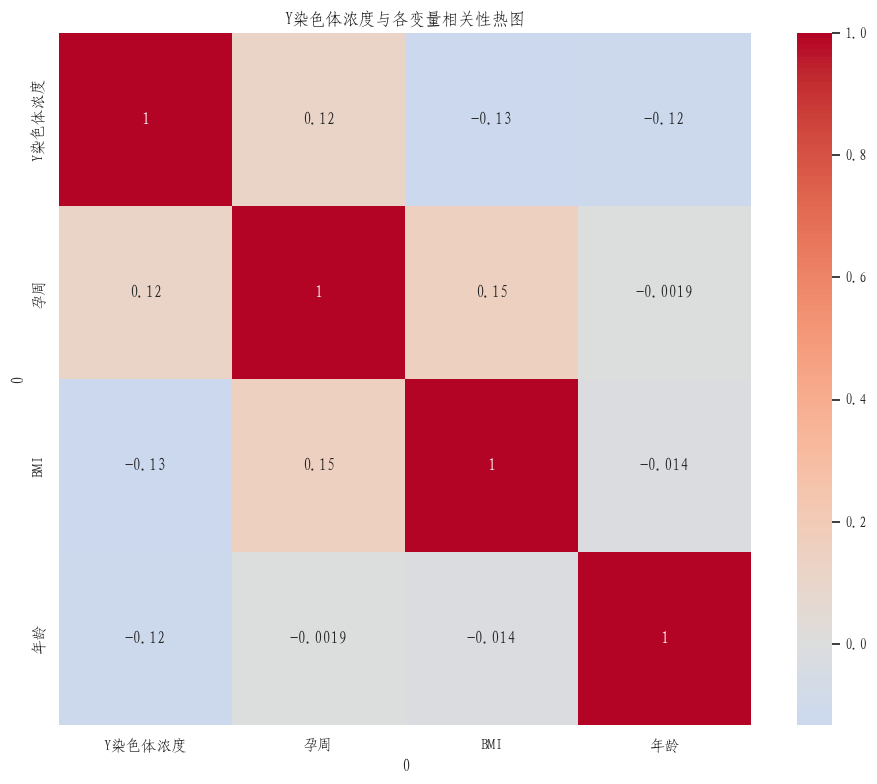

📊 相关性热图已保存


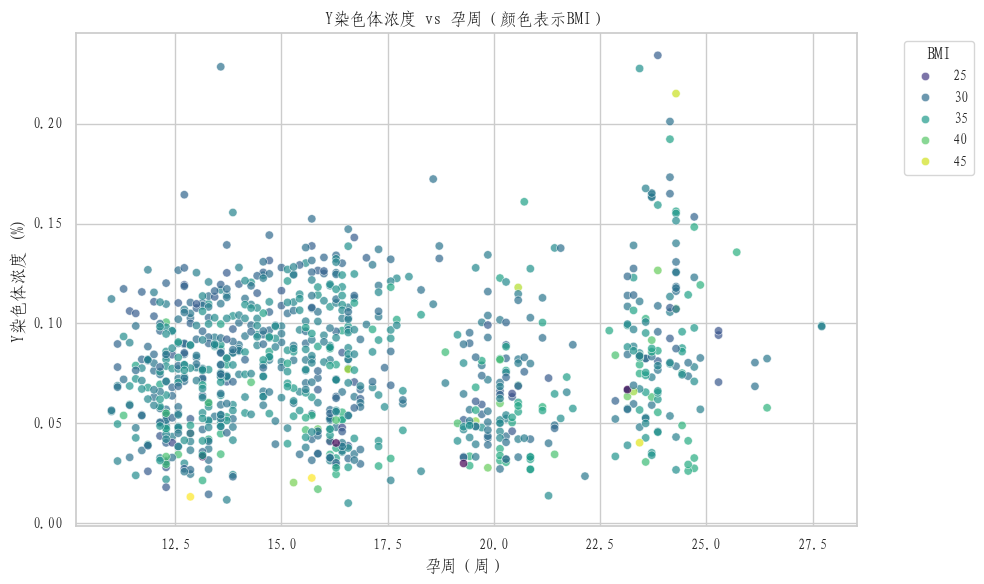

📊 散点图（Y vs 孕周）已保存


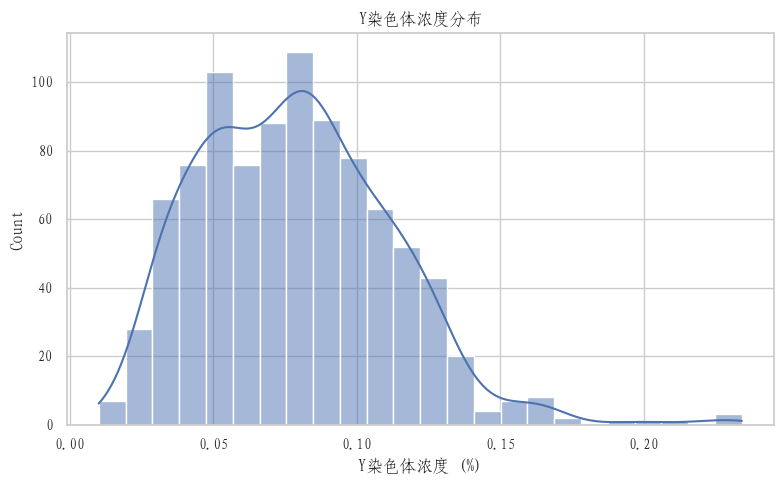

📊 Y浓度分布图已保存


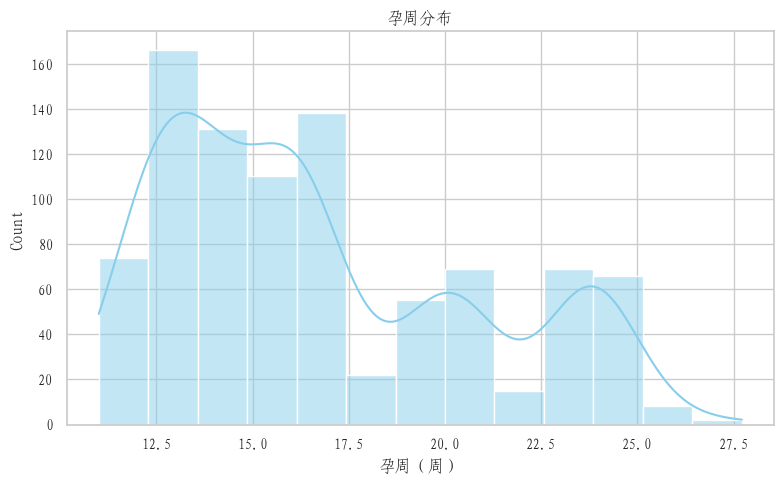

📊 孕周分布图已保存

🧮 建立回归模型...
📊 建模样本数：925

➡️ 模型1：线性回归 Y ~ 孕周 + BMI
                            OLS Regression Results                            
Dep. Variable:                 Y染色体浓度   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     17.50
Date:                Sun, 07 Sep 2025   Prob (F-statistic):           3.46e-08
Time:                        01:03:46   Log-Likelihood:                 1847.4
No. Observations:                 925   AIC:                            -3689.
Df Residuals:                     922   BIC:                            -3674.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

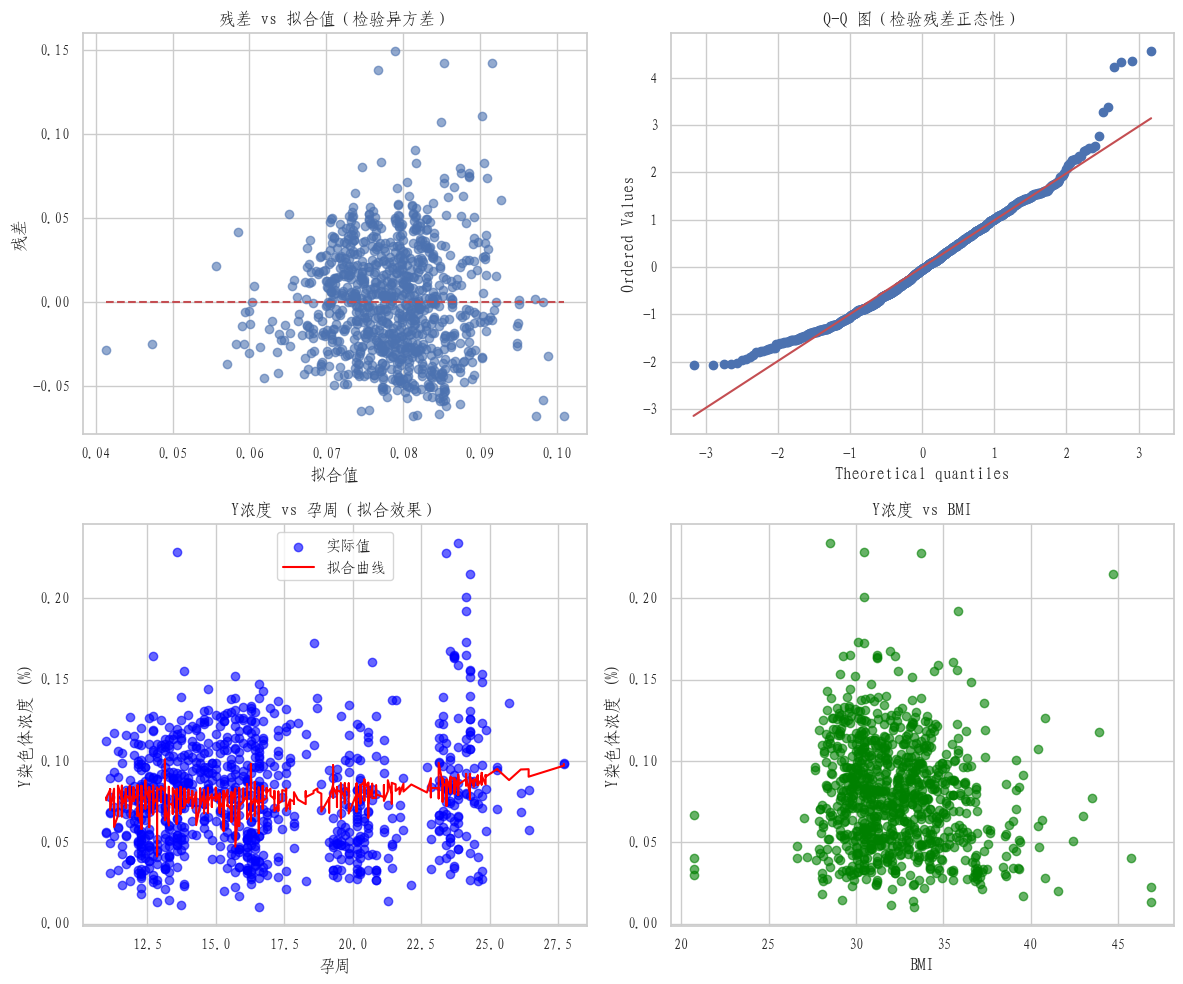

✅ 残差诊断图已保存

🔁 建立混合效应模型（随机截距）...
          Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  Y染色体浓度   
No. Observations:  925      Method:              REML     
No. Groups:        260      Scale:               0.0003   
Min. group size:   1        Log-Likelihood:      2125.0459
Max. group size:   8        Converged:           Yes      
Mean group size:   3.6                                    
----------------------------------------------------------
                Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------
Intercept        0.149    0.037  4.050 0.000  0.077  0.221
孕周              -0.004    0.002 -2.035 0.042 -0.008 -0.000
np.power(孕周, 2)  0.000    0.000  3.813 0.000  0.000  0.000
BMI             -0.002    0.001 -2.059 0.039 -0.005 -0.000
孕周:BMI           0.000    0.000  1.027 0.305 -0.000  0.000
Group Var        0.001    0.006                           

📄 混合效应模型结果已保存

✅ 问题1 结果汇总
🔹 样本总数：1

In [ ]:
# -*- coding: utf-8 -*-
"""
C题 问题1：Y染色体浓度与孕周、BMI的相关性建模
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols, mixedlm
import os
from pathlib import Path

# 设置中文字体和图形样式
import matplotlib
sns.set(style="whitegrid")
fm = matplotlib.font_manager.fontManager
fm.addfont("./仿宋_GB2312.TTF")
fm.addfont("./times.ttf")
# 设置中文字体和负号正常显示
plt.rcParams["font.sans-serif"] = ["FangSong_GB2312", "times"]
plt.rcParams["axes.unicode_minus"] = False

# 创建保存图表的目录
output_dir = Path("C1_Output")
output_dir.mkdir(exist_ok=True)

print("✅ 正在读取数据...")

# 读取两个Excel文件
file_male = '附件 - 男胎检测数据.xlsx'
file_female = '附件 - 女胎检测数据.xlsx'

# 分别读取所有sheet或跳过标题行
sheets_male = pd.read_excel(file_male, sheet_name=None, header=None)
sheets_female = pd.read_excel(file_female, sheet_name=None, header=None)

# 合并所有sheet的数据（去除重复标题行）
data_frames = []

for name, df in sheets_male.items():
    # 找到标题行（包含“序号”的行）
    header_row = df[df.apply(lambda x: x.astype(str).str.contains('序号', na=False).any(), axis=1)]
    if not header_row.empty:
        idx = header_row.index[0]
        df.columns = df.iloc[idx]
        df = df.iloc[idx+1:].reset_index(drop=True)
        data_frames.append(df)

for name, df in sheets_female.items():
    header_row = df[df.apply(lambda x: x.astype(str).str.contains('序号', na=False).any(), axis=1)]
    if not header_row.empty:
        idx = header_row.index[0]
        df.columns = df.iloc[idx]
        df = df.iloc[idx+1:].reset_index(drop=True)
        data_frames.append(df)

# 合并所有数据
df = pd.concat(data_frames, ignore_index=True)
print(f"📊 合并后总样本数：{len(df)}")

# 保存原始列名以供参考
original_columns = df.columns.tolist()
print("📋 原始列名：", original_columns)

# 转换数据类型
numeric_cols = [
    '年龄', '身高', '体重', '孕妇BMI', '原始读段数', '在参考基因组上比对的比例',
    '重复读段的比例', '唯一比对的读段数', 'GC含量', '13号染色体的Z值',
    '18号染色体的Z值', '21号染色体的Z值', 'X染色体的Z值', 'Y染色体的Z值',
    'Y染色体浓度', 'X染色体浓度', '13号染色体的GC含量', '18号染色体的GC含量',
    '21号染色体的GC含量', '被过滤掉读段数的比例'
]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# 提取孕周列（格式如 "12w+4"）
def parse_gestational_week(gw_str):
    try:
        if pd.isna(gw_str):
            return np.nan
        gw_str = str(gw_str).strip()
        if 'w' in gw_str:
            parts = gw_str.split('w+')
            week = float(parts[0])
            day = float(parts[1]) if len(parts) > 1 else 0
            return week + day / 7
        elif 'W' in gw_str:
            parts = gw_str.split('W+')
            week = float(parts[0])
            day = float(parts[1]) if len(parts) > 1 else 0
            return week + day / 7
        else:
            return float(gw_str)
    except:
        return np.nan

df['孕周'] = df['检测孕周'].apply(parse_gestational_week)

# 验证BMI
df['计算BMI'] = df['体重'] / (df['身高'] / 100) ** 2
bmi_diff = np.abs(df['计算BMI'] - df['孕妇BMI'])
print(f"🔍 BMI验证：最大差异 = {bmi_diff.max():.4f}")
if bmi_diff.max() > 0.1:
    print("⚠️ 存在BMI计算不一致，请检查")
df['BMI'] = df['孕妇BMI']  # 使用原始列

# ==================== 第一步：筛选男胎样本 ====================

print("\n🔍 正在筛选男胎样本（Y染色体浓度非空且 > 0）...")
male_df = df[df['Y染色体浓度'].notna() & (df['Y染色体浓度'] > 0)].copy()
print(f"✅ 男胎样本数量：{len(male_df)}")

# 剔除明显异常数据
print("\n🧹 数据清洗：剔除GC含量异常、测序深度过低样本...")
clean_df = male_df[
    (male_df['GC含量'].between(0.35, 0.65)) &           # 接近40%-60%
    (male_df['原始读段数'] > 3_000_000) &                # 足够测序深度
    (male_df['被过滤掉读段数的比例'] < 0.1) &           # 过滤比例合理
    (male_df['孕周'].between(8, 28)) &                  # 孕期合理
    (male_df['Y染色体浓度'] <= 15)                      # 极端高值可能是错误
].copy()

print(f"✅ 清洗后男胎样本数：{len(clean_df)}")

# 保存中间数据
clean_df.to_csv(output_dir / "clean_male_data.csv", index=False, encoding='utf-8-sig')
print(f"💾 清洗后数据已保存至：{output_dir / 'clean_male_data.csv'}")

# ==================== 第二步：探索性数据分析（EDA） ====================

print("\n📈 开始探索性数据分析...")

# 1. 相关性热图
plt.figure(figsize=(10, 8))
corr = clean_df[['Y染色体浓度', '孕周', 'BMI', '年龄']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, square=True)
plt.title("Y染色体浓度与各变量相关性热图")
plt.tight_layout()
plt.savefig(output_dir / "correlation_heatmap.png", dpi=300)
plt.show()
print("📊 相关性热图已保存")

# 2. 散点图：Y浓度 ~ 孕周，按BMI分组着色
plt.figure(figsize=(10, 6))
sns.scatterplot(data=clean_df, x='孕周', y='Y染色体浓度', hue='BMI', palette='viridis', alpha=0.7)
plt.title("Y染色体浓度 vs 孕周（颜色表示BMI）")
plt.xlabel("孕周（周）")
plt.ylabel("Y染色体浓度 (%)")
plt.legend(title="BMI", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(output_dir / "scatter_y_vs_gw_by_bmi.png", dpi=300)
plt.show()
print("📊 散点图（Y vs 孕周）已保存")

# 3. Y浓度分布
plt.figure(figsize=(8, 5))
sns.histplot(clean_df['Y染色体浓度'], kde=True)
plt.title("Y染色体浓度分布")
plt.xlabel("Y染色体浓度 (%)")
plt.tight_layout()
plt.savefig(output_dir / "hist_y_concentration.png", dpi=300)
plt.show()
print("📊 Y浓度分布图已保存")

# 4. 孕周分布
plt.figure(figsize=(8, 5))
sns.histplot(clean_df['孕周'], kde=True, color='skyblue')
plt.title("孕周分布")
plt.xlabel("孕周（周）")
plt.tight_layout()
plt.savefig(output_dir / "hist_gestational_week.png", dpi=300)
plt.show()
print("📊 孕周分布图已保存")

# ==================== 第三步：建立回归模型 ====================

print("\n🧮 建立回归模型...")

# 准备建模数据
model_data = clean_df[['Y染色体浓度', '孕周', 'BMI']].dropna().copy()
print(f"📊 建模样本数：{len(model_data)}")

# 添加交互项和二次项
model_data['孕周_2'] = model_data['孕周'] ** 2
model_data['孕周_BMI'] = model_data['孕周'] * model_data['BMI']

# 模型1：线性模型
print("\n➡️ 模型1：线性回归 Y ~ 孕周 + BMI")
X1 = sm.add_constant(model_data[['孕周', 'BMI']])
y = model_data['Y染色体浓度']
model1 = sm.OLS(y, X1).fit()
print(model1.summary())
with open(output_dir / "model1_summary.txt", "w", encoding="utf-8") as f:
    f.write(model1.summary().as_text())
print("📄 线性模型结果已保存")

# 模型2：含交互项和二次项
print("\n➡️ 模型2：多项式 + 交互项 Y ~ 孕周 + 孕周² + BMI + 孕周:BMI")
X2 = sm.add_constant(model_data[['孕周', '孕周_2', 'BMI', '孕周_BMI']])
model2 = sm.OLS(y, X2).fit()
print(model2.summary())
with open(output_dir / "model2_summary.txt", "w", encoding="utf-8") as f:
    f.write(model2.summary().as_text())
print("📄 多项式模型结果已保存")

# ==================== 残差诊断图（手动绘制）====================
print("\n📊 正在绘制残差诊断图...")

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. 残差 vs 拟合值
axes[0, 0].scatter(model2.fittedvalues, model2.resid, alpha=0.6)
axes[0, 0].hlines(0, model2.fittedvalues.min(), model2.fittedvalues.max(), colors='r', linestyles='dashed')
axes[0, 0].set_xlabel("拟合值")
axes[0, 0].set_ylabel("残差")
axes[0, 0].set_title("残差 vs 拟合值（检验异方差）")

# 2. Q-Q 图（检验正态性）
residuals_norm = (model2.resid - model2.resid.mean()) / model2.resid.std()
stats.probplot(residuals_norm, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title("Q-Q 图（检验残差正态性）")

# 3. Y浓度 vs 孕周（实际 vs 拟合）
axes[1, 0].scatter(model_data['孕周'], model_data['Y染色体浓度'], alpha=0.6, label='实际值', color='blue')
sorted_idx = np.argsort(model_data['孕周'])
axes[1, 0].plot(model_data['孕周'].iloc[sorted_idx], model2.fittedvalues.iloc[sorted_idx],
                color='red', label='拟合曲线')
axes[1, 0].set_xlabel("孕周")
axes[1, 0].set_ylabel("Y染色体浓度 (%)")
axes[1, 0].set_title("Y浓度 vs 孕周（拟合效果）")
axes[1, 0].legend()

# 4. Y浓度 vs BMI
axes[1, 1].scatter(model_data['BMI'], model_data['Y染色体浓度'], alpha=0.6, color='green')
axes[1, 1].set_xlabel("BMI")
axes[1, 1].set_ylabel("Y染色体浓度 (%)")
axes[1, 1].set_title("Y浓度 vs BMI")

plt.tight_layout()
plt.savefig(output_dir / "residual_diagnostics.png", dpi=300)
plt.show()
print("✅ 残差诊断图已保存")

# ==================== 第四步：混合效应模型（考虑孕妇个体差异）====================

print("\n🔁 建立混合效应模型（随机截距）...")

# 添加孕妇ID
model_data_with_id = clean_df[['Y染色体浓度', '孕周', 'BMI', '孕妇代码']].dropna().copy()
model_data_with_id['孕周_2'] = model_data_with_id['孕周'] ** 2
model_data_with_id['孕周_BMI'] = model_data_with_id['孕周'] * model_data_with_id['BMI']

# 使用 statsmodels 的 MixedLM（仅支持随机截距）
try:
    mixed_model = mixedlm(
        "Y染色体浓度 ~ 孕周 + np.power(孕周, 2) + BMI + 孕周:BMI",
        model_data_with_id,
        groups=model_data_with_id["孕妇代码"]
    )
    mixed_result = mixed_model.fit()
    print(mixed_result.summary())
    with open(output_dir / "mixed_model_summary.txt", "w", encoding="utf-8") as f:
        f.write(mixed_result.summary().as_text())
    print("📄 混合效应模型结果已保存")
except Exception as e:
    print(f"⚠️ 混合模型拟合失败：{e}")

# ==================== 第五步：显著性检验汇总 ====================

print("\n" + "="*50)
print("✅ 问题1 结果汇总")
print("="*50)

print(f"🔹 样本总数：{len(df)}")
print(f"🔹 男胎有效样本数：{len(clean_df)}")
print(f"🔹 最终建模样本数：{len(model_data)}")

print("\n🔹 线性模型关键结果：")
print(f"   R² = {model1.rsquared:.4f}, F-statistic p-value = {model1.f_pvalue:.2e}")
print(f"   孕周系数 = {model1.params['孕周']:.4f} (p = {model1.pvalues['孕周']:.2e})")
print(f"   BMI系数 = {model1.params['BMI']:.4f} (p = {model1.pvalues['BMI']:.2e})")

print("\n🔹 多项式+交互模型关键结果：")
print(f"   R² = {model2.rsquared:.4f}, F-statistic p-value = {model2.f_pvalue:.2e}")
print(f"   孕周系数 = {model2.params['孕周']:.4f} (p = {model2.pvalues['孕周']:.2e})")
print(f"   BMI系数 = {model2.params['BMI']:.4f} (p = {model2.pvalues['BMI']:.2e})")
print(f"   交互项系数 = {model2.params['孕周_BMI']:.4f} (p = {model2.pvalues['孕周_BMI']:.2e})")

# 显著性结论
alpha = 0.05
print(f"\n🔹 显著性结论（α = {alpha}）：")
if model2.pvalues['孕周'] < alpha:
    print("   ✅ 孕周对Y浓度有显著正向影响")
else:
    print("   ❌ 孕周无显著影响")

if model2.pvalues['BMI'] < alpha:
    print("   ✅ BMI对Y浓度有显著负向影响")
else:
    print("   ❌ BMI无显著影响")

if model2.pvalues['孕周_BMI'] < alpha:
    print("   ✅ 孕周与BMI存在显著交互作用")
else:
    print("   ❌ 无显著交互作用")

print(f"\n🎉 所有中间步骤已完成，图表与结果已保存至 '{output_dir}' 目录")

✅ 正在读取数据...
📊 合并后总样本数：1687
📋 原始列名： ['序号', '孕妇代码', '年龄', '身高', '体重', '末次月经', 'IVF妊娠', '检测日期', '检测抽血次数', '检测孕周', '孕妇BMI', '原始读段数', '在参考基因组上比对的比例', '重复读段的比例', '唯一比对的读段数  ', 'GC含量', '13号染色体的Z值', '18号染色体的Z值', '21号染色体的Z值', 'X染色体的Z值', 'Y染色体的Z值', 'Y染色体浓度', 'X染色体浓度', '13号染色体的GC含量', '18号染色体的GC含量', '21号染色体的GC含量', '被过滤掉读段数的比例', '染色体的非整倍体', '怀孕次数', '生产次数', '胎儿是否健康', '唯一比对的读段数']
🔍 BMI验证：最大差异 = 0.0022

🔍 正在筛选男胎样本（Y染色体浓度非空且 > 0）...
✅ 男胎样本数量：1082

🧹 数据清洗：剔除GC含量异常、测序深度过低样本...
✅ 清洗后男胎样本数：925
💾 清洗后数据已保存至：C1_Output/clean_male_data.csv

📈 开始探索性数据分析...
📊 孕周分布图已保存

🧮 建立回归模型...
📊 建模样本数：925

➡️ 模型1：线性回归 Y ~ 孕周 + BMI
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Y染色体浓度   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     17.50
Date:                Sun, 07 Sep 2025   Prob (F-statistic):           3.46e-08
Time:                        01:03:46   Log-Likelihood:                 1847.4
No. Observations:                 925   AIC:                            -3689.
Df Residuals:                     922   BIC:                            -3674.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1150      0.012      9.505      0.000       0.091       0.139
孕周             0.0012      0.000      4.266      0.000       0.001       0.002
BMI           -0.0017      0.000     -4.707      0.000      -0.002      -0.001
==============================================================================
Omnibus:                       64.482   Durbin-Watson:                   0.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.130
Skew:                           0.589   Prob(JB):                     1.98e-19
Kurtosis:                       3.920   Cond. No.                         409.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
📄 线性模型结果已保存

➡️ 模型2：多项式 + 交互项 Y ~ 孕周 + 孕周² + BMI + 孕周:BMI
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Y染色体浓度   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     9.777
Date:                Sun, 07 Sep 2025   Prob (F-statistic):           9.52e-08
Time:                        01:03:46   Log-Likelihood:                 1849.4
No. Observations:                 925   AIC:                            -3689.
Df Residuals:                     920   BIC:                            -3665.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2114      0.053      3.961      0.000       0.107       0.316
孕周            -0.0061      0.004     -1.684      0.093      -0.013       0.001
孕周_2        9.773e-05   7.38e-05      1.324      0.186   -4.72e-05       0.000
BMI           -0.0038      0.002     -2.398      0.017      -0.007      -0.001
孕周_BMI         0.0001   8.67e-05      1.334      0.183   -5.45e-05       0.000
==============================================================================
Omnibus:                       58.134   Durbin-Watson:                   0.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.202
Skew:                           0.565   Prob(JB):                     7.71e-17
Kurtosis:                       3.806   Cond. No.                     3.23e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
📄 多项式模型结果已保存

📊 正在绘制残差诊断图...
✅ 残差诊断图已保存

🔁 建立混合效应模型（随机截距）...
          Mixed Linear Model Regression Results
==========================================================
Model:             MixedLM  Dependent Variable:  Y染色体浓度   
No. Observations:  925      Method:              REML     
No. Groups:        260      Scale:               0.0003   
Min. group size:   1        Log-Likelihood:      2125.0459
Max. group size:   8        Converged:           Yes      
Mean group size:   3.6                                    
----------------------------------------------------------
                Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------
Intercept        0.149    0.037  4.050 0.000  0.077  0.221
孕周              -0.004    0.002 -2.035 0.042 -0.008 -0.000
np.power(孕周, 2)  0.000    0.000  3.813 0.000  0.000  0.000
BMI             -0.002    0.001 -2.059 0.039 -0.005 -0.000
孕周:BMI           0.000    0.000  1.027 0.305 -0.000  0.000
Group Var        0.001    0.006                           
==========================================================

📄 混合效应模型结果已保存

==================================================
✅ 问题1 结果汇总
==================================================
🔹 样本总数：1687
🔹 男胎有效样本数：925
🔹 最终建模样本数：925

🔹 线性模型关键结果：
   R² = 0.0366, F-statistic p-value = 3.46e-08
   孕周系数 = 0.0012 (p = 2.20e-05)
   BMI系数 = -0.0017 (p = 2.90e-06)

🔹 多项式+交互模型关键结果：
   R² = 0.0408, F-statistic p-value = 9.52e-08
   孕周系数 = -0.0061 (p = 9.25e-02)
   BMI系数 = -0.0038 (p = 1.67e-02)
   交互项系数 = 0.0001 (p = 1.83e-01)

🔹 显著性结论（α = 0.05）：
   ❌ 孕周无显著影响
   ✅ BMI对Y浓度有显著负向影响
   ❌ 无显著交互作用

🎉 所有中间步骤已完成，图表与结果已保存至 'C1_Output' 目录

In [ ]:
# -*- coding: utf-8 -*-
"""
2025高教社杯C题 - 问题2：NIPT最佳时点建模
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
# 设置中文字体和图形样式
import matplotlib
fm = matplotlib.font_manager.fontManager
fm.addfont("./仿宋_GB2312.TTF")
fm.addfont("./times.ttf")
# 设置中文字体和负号正常显示
plt.rcParams["font.sans-serif"] = ["FangSong_GB2312", "times"]
plt.rcParams["axes.unicode_minus"] = False


# 创建输出目录
output_dir = Path("C2_Output")
output_dir.mkdir(exist_ok=True)

print("✅ 正在读取清洗后的男胎数据...")
# 假设问题1已生成 clean_male_data.csv
df = pd.read_csv("C1_Output/clean_male_data.csv")

# 确保关键列存在
assert 'Y染色体浓度' in df.columns, "缺少Y染色体浓度列"
assert '检测孕周' in df.columns, "缺少检测孕周列"
assert '孕妇BMI' in df.columns, "缺少BMI列"

print(f"📊 当前男胎样本数：{len(df)}")

# 提取孕周数值（如 '16w+4' -> 16 + 4/7 ≈ 16.57）
def parse_gestational_week(gw_str):
    if pd.isna(gw_str):
        return np.nan
    try:
        if 'w+' in gw_str:
            week, day = gw_str.split('w+')
            return float(week) + float(day) / 7
        elif 'w' in gw_str:
            return float(gw_str.replace('w', ''))
        else:
            return float(gw_str)
    except:
        return np.nan

df['孕周'] = df['检测孕周'].apply(parse_gestational_week)
df = df.dropna(subset=['孕周', 'Y染色体浓度', '孕妇BMI'])
df = df[(df['孕周'] >= 8) & (df['孕周'] <= 28)]  # 合理孕周范围

print(f"🧹 清洗后有效样本数：{len(df)}")

# 标记Y浓度是否达标
THRESHOLD = 0.04  # 4%
df['Y达标'] = df['Y染色体浓度'] >= THRESHOLD

# 按孕妇代码分组，找到每个孕妇首次达标的时间
print("🔍 正在计算每位孕妇Y浓度首次达标时间...")
first达标 = df[df['Y达标']].groupby('孕妇代码').agg({
    '孕周': 'min'
}).rename(columns={'孕周': '首次达标孕周'})

# 合并回原数据
df = df.merge(first达标, on='孕妇代码', how='left')

# 只保留每个孕妇的最早一次检测记录用于分组分析
df = df.sort_values('孕周').groupby('孕妇代码').first().reset_index()

print(f"📌 可用于分组的孕妇数：{len(df)}")

# 定义BMI分组区间
bmi_bins = [20, 28, 32, 36, 40, 100]  # 扩展范围
bmi_labels = ['[20,28)', '[28,32)', '[32,36)', '[36,40)', '≥40']
df['BMI组'] = pd.cut(df['孕妇BMI'], bins=bmi_bins, labels=bmi_labels, include_lowest=True)


✅ 正在读取清洗后的男胎数据...
📊 当前男胎样本数：925
🧹 清洗后有效样本数：925
🔍 正在计算每位孕妇Y浓度首次达标时间...
📌 可用于分组的孕妇数：260


         孕妇数量  平均首次达标孕周  中位首次达标孕周  80分位达标孕周  90分位达标孕周
BMI组                                                 
[20,28)    18     15.17     16.14     16.29     17.79
[28,32)   455     13.95     12.86     15.86     17.57
[32,36)   357     13.43     12.86     13.83     16.14
[36,40)    80     15.06     13.57     16.43     20.57
≥40        15     16.29     15.86     19.57     19.57


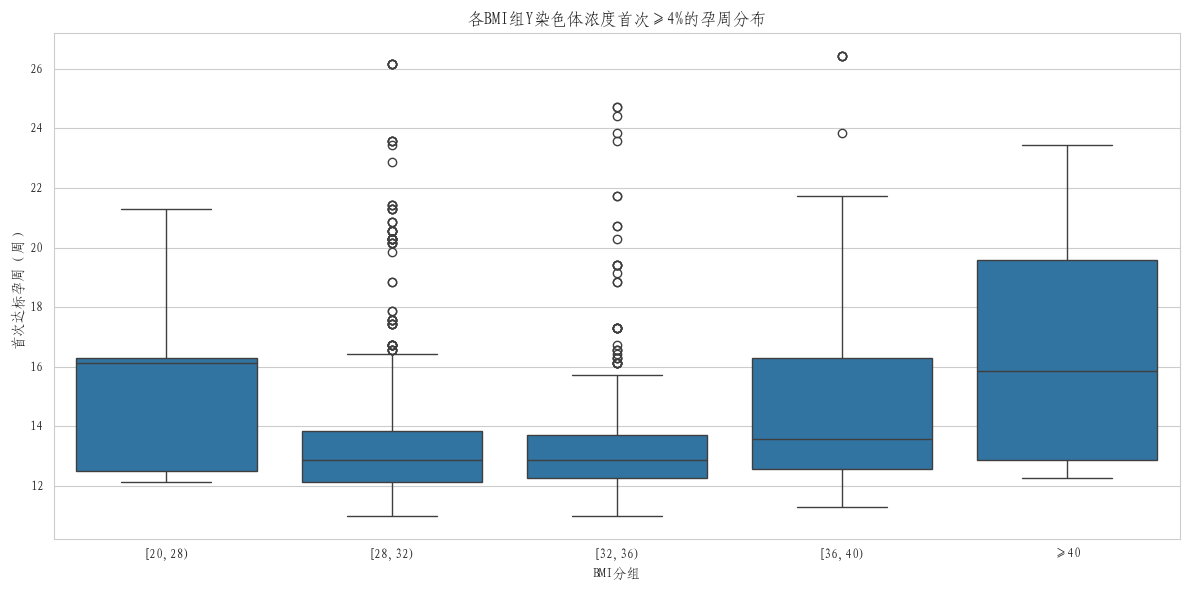

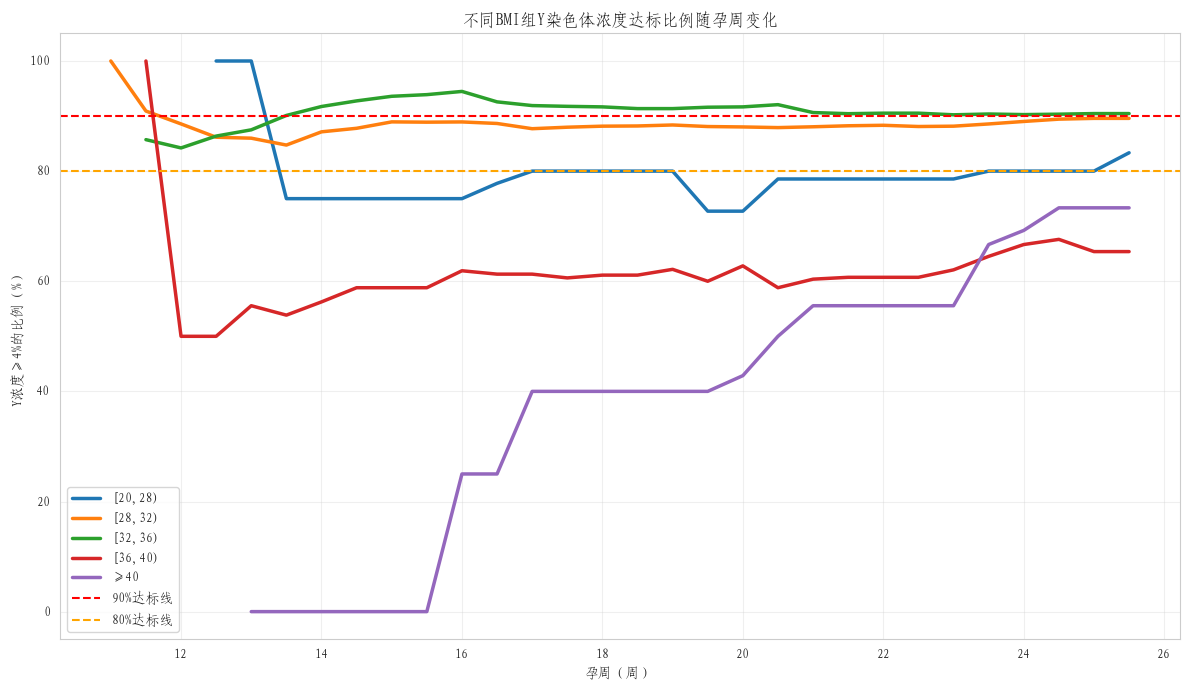

80分位达标孕周（含NaN）：
BMI组
[20,28)    16.29
[28,32)    15.86
[32,36)    13.83
[36,40)    16.43
≥40        19.57
Name: 80分位达标孕周, dtype: float64

🎯 问题2：最佳NIPT时点建议（基于80%分位）
         最佳NIPT时点（周） 建议检测时间
BMI组                       
[20,28)        16.29  16周2天
[28,32)        15.86  15周6天
[32,36)        13.83  13周5天
[36,40)        16.43  16周3天
≥40            19.57  19周3天

🔍 检测误差影响分析...
考虑±0.5周时间误差的置信区间：
         最佳NIPT时点（周）   时点下限   时点上限
BMI组                              
[20,28)        16.29  15.79  16.79
[28,32)        15.86  15.36  16.36
[32,36)        13.83  13.33  14.33
[36,40)        16.43  15.93  16.93
≥40            19.57  19.07  20.07

加入±5%浓度测量误差后，各组80%分位达标时间变化：
BMI组
[20,28)    16.29
[28,32)    15.86
[32,36)    13.83
[36,40)    16.43
≥40        19.57
Name: 首次达标孕周, dtype: float64

🎉 问题2完成！所有结果已保存至 'C2_Output' 目录


In [6]:

# 计算每组的首次达标孕周统计
group_stats = df.groupby('BMI组').agg(
    n_samples=('孕妇代码', 'size'),
    mean_attainment=('首次达标孕周', 'mean'),
    median_attainment=('首次达标孕周', 'median'),
    q80_attainment=('首次达标孕周', lambda x: x.quantile(0.8)),
    q90_attainment=('首次达标孕周', lambda x: x.quantile(0.9))
).round(2)

# 重命名为中文便于输出
group_stats.columns = ['孕妇数量', '平均首次达标孕周', '中位首次达标孕周', '80分位达标孕周', '90分位达标孕周']
print(group_stats)

# 保存结果
group_stats.to_csv(output_dir / "bmi_group_first_attainment.csv")
df.to_csv(output_dir / "bmi_grouped_data.csv", index=False)

# 绘制：各BMI组首次达标孕周分布
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='BMI组', y='首次达标孕周')
plt.title("各BMI组Y染色体浓度首次≥4%的孕周分布")
plt.ylabel("首次达标孕周（周）")
plt.xlabel("BMI分组")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig(output_dir / "first_attainment_by_bmi.png", dpi=300)
plt.show()

# 绘制：达标比例随孕周变化（按BMI组）
plt.figure(figsize=(12, 7))
for label in bmi_labels:
    data = df[df['BMI组'] == label]
    if len(data) == 0:
        continue
    weeks = np.arange(10, 26, 0.5)
    attainment_ratio = []
    for w in weeks:
        ratio = (data[data['孕周'] <= w]['Y达标'].mean()) * 100
        attainment_ratio.append(ratio)
    plt.plot(weeks, attainment_ratio, label=f'{label}', linewidth=2.5)

plt.axhline(y=90, color='r', linestyle='--', label='90%达标线')
plt.axhline(y=80, color='orange', linestyle='--', label='80%达标线')
plt.xlabel("孕周（周）")
plt.ylabel("Y浓度≥4%的比例（%）")
plt.title("不同BMI组Y染色体浓度达标比例随孕周变化")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(output_dir / "attainment_ratio_by_bmi.png", dpi=300)
plt.show()

# 最佳NIPT时点建议（取80%分位）
best_timing = group_stats[['80分位达标孕周']].copy()

print("80分位达标孕周（含NaN）：")
print(group_stats['80分位达标孕周'])

best_timing.columns = ['最佳NIPT时点（周）']
best_timing['建议检测时间'] = best_timing['最佳NIPT时点（周）'].apply(lambda x: f"{int(x)}周{int((x-int(x))*7)}天")

print("\n🎯 问题2：最佳NIPT时点建议（基于80%分位）")
print(best_timing)

best_timing.to_csv(output_dir / "best_nipt_timing_q2.csv")

# 检测误差影响分析
print("\n🔍 检测误差影响分析...")
# 假设测量误差：±0.5周（时间误差）或 ±5%浓度误差
# 时间误差：最佳时点 ±0.5周
best_timing['时点下限'] = best_timing['最佳NIPT时点（周）'] - 0.5
best_timing['时点上限'] = best_timing['最佳NIPT时点（周）'] + 0.5
print("考虑±0.5周时间误差的置信区间：")
print(best_timing[['最佳NIPT时点（周）', '时点下限', '时点上限']])

# 浓度误差：若真实浓度有±5%波动，达标时间可能延迟
# 模拟：在原浓度上加噪声，重新计算达标时间
np.random.seed(42)
df_noisy = df.copy()
df_noisy['Y染色体浓度_噪声'] = df_noisy['Y染色体浓度'] * np.random.uniform(0.95, 1.05, len(df_noisy))
df_noisy['Y达标_噪声'] = df_noisy['Y染色体浓度_噪声'] >= THRESHOLD

first达标_噪声 = df_noisy[df_noisy['Y达标_噪声']].groupby('孕妇代码')['孕周'].min()
df = df.merge(first达标_噪声, on='孕妇代码', how='left', suffixes=('', '_噪声'))

# 重新计算各组80%分位
noise_impact = df.groupby('BMI组')['首次达标孕周'].quantile(0.8).round(2)
print("\n加入±5%浓度测量误差后，各组80%分位达标时间变化：")
print(noise_impact)

print(f"\n🎉 问题2完成！所有结果已保存至 '{output_dir}' 目录")

✅ 正在读取数据...
📊 建模样本数：925

🧮 正在构建逻辑回归模型 P(Y≥4%) ~ 孕周 + BMI + 年龄 + 身高 + 体重 + GC含量 ...
                           Logit Regression Results                           
Dep. Variable:                    Y达标   No. Observations:                  925
Model:                          Logit   Df Residuals:                      918
Method:                           MLE   Df Model:                            6
Date:                Sun, 07 Sep 2025   Pseudo R-squ.:                 0.03392
Time:                        04:44:24   Log-Likelihood:                -335.51
converged:                       True   LL-Null:                       -347.29
Covariance Type:            nonrobust   LLR p-value:                 0.0006294
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -57.8469     34.069     -1.698      0.090    -124.620       8.927
孕周             0.0344      0.026      1.314     

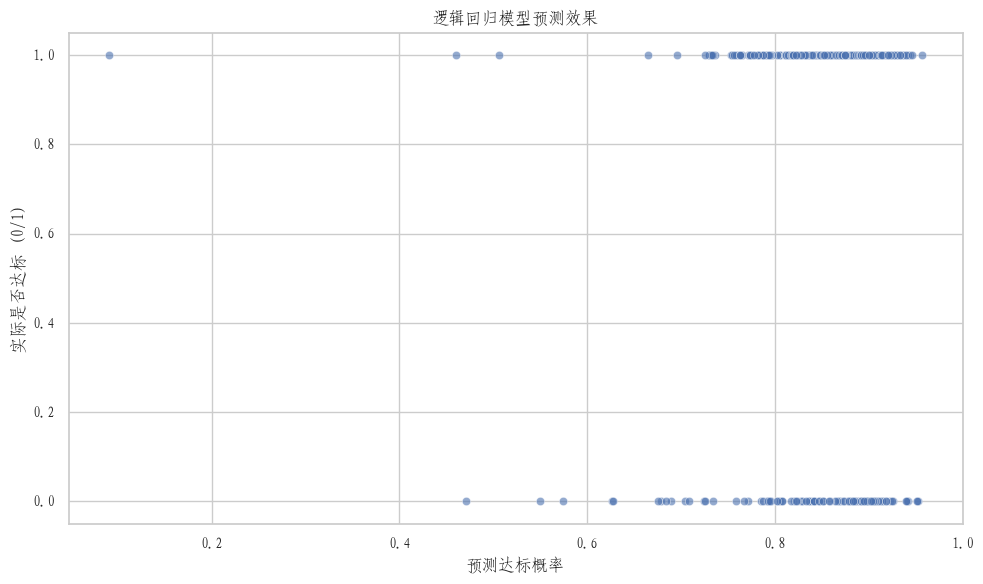

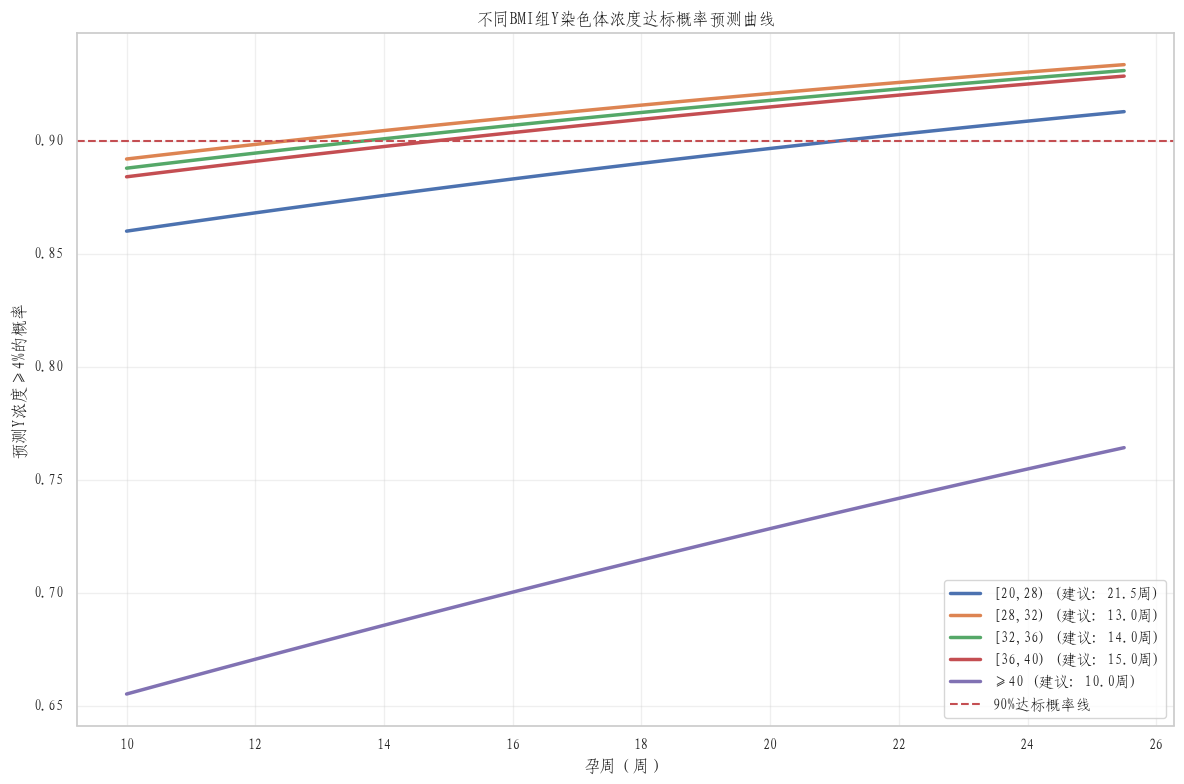


🎯 问题3：综合模型最佳NIPT时点建议（P≥90%）
        最佳时点(周)   建议时间
[20,28)    21.5  21周3天
[28,32)    13.0  13周0天
[32,36)    14.0  14周0天
[36,40)    15.0  15周0天
≥40        10.0  10周0天

🔍 检测误差影响分析...
加入±5%浓度误差后模型AUC = 0.623（原为 0.618）

🎉 问题3完成！所有结果已保存至 'C3_Output' 目录


In [24]:
# -*- coding: utf-8 -*-
"""
2025高教社杯C题 - 问题3：综合多因素建模
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from pathlib import Path
from sklearn.metrics import roc_auc_score, classification_report
import warnings
warnings.filterwarnings('ignore')


sns.set_style("whitegrid")
fm = matplotlib.font_manager.fontManager
fm.addfont("./仿宋_GB2312.TTF")
fm.addfont("./times.ttf")
# 设置中文字体和负号正常显示
plt.rcParams["font.sans-serif"] = ["FangSong_GB2312", "times"]
plt.rcParams["axes.unicode_minus"] = False

output_dir = Path("C3_Output")
output_dir.mkdir(exist_ok=True)

print("✅ 正在读取数据...")
df = pd.read_csv("C1_Output/clean_male_data.csv")

# 解析孕周
def parse_gestational_week(gw_str):
    if pd.isna(gw_str):
        return np.nan
    try:
        if 'w+' in gw_str:
            week, day = gw_str.split('w+')
            return float(week) + float(day) / 7
        elif 'w' in gw_str:
            return float(gw_str.replace('w', ''))
        else:
            return float(gw_str)
    except:
        return np.nan

df['孕周'] = df['检测孕周'].apply(parse_gestational_week)
df = df.dropna(subset=['孕周', 'Y染色体浓度', '孕妇BMI', '年龄', '身高', '体重'])
df['Y达标'] = (df['Y染色体浓度'] >= 0.04).astype(int)

# 定义BMI组
bmi_bins = [20, 28, 32, 36, 40, 50]
bmi_labels = ['[20,28)', '[28,32)', '[32,36)', '[36,40)', '≥40']
df['BMI组'] = pd.cut(df['孕妇BMI'], bins=bmi_bins, labels=bmi_labels, include_lowest=True)

print(f"📊 建模样本数：{len(df)}")

# 构建逻辑回归模型
print("\n🧮 正在构建逻辑回归模型 P(Y≥4%) ~ 孕周 + BMI + 年龄 + 身高 + 体重 + GC含量 ...")

# 特征工程
X = df[['孕周', '孕妇BMI', '年龄', '身高', '体重', 'GC含量']]
X = sm.add_constant(X)  # 添加截距
y = df['Y达标']

# 拟合模型
model = sm.Logit(y, X).fit(disp=False)
print(model.summary())

# 预测概率
df['P_Y达标'] = model.predict(X)

# ROC AUC
auc = roc_auc_score(y, df['P_Y达标'])
print(f"\n✅ 模型AUC = {auc:.3f}")

# 按BMI组分析
print("\n📈 各BMI组逻辑回归预测效果：")
group_auc = df.groupby('BMI组').apply(lambda g: roc_auc_score(g['Y达标'], g['P_Y达标']))
print(group_auc)

# 绘制：预测概率 vs 实际达标
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='P_Y达标', y='Y达标', alpha=0.6)
plt.xlabel("预测达标概率")
plt.ylabel("实际是否达标 (0/1)")
plt.title("逻辑回归模型预测效果")
plt.tight_layout()
plt.savefig(output_dir / "logit_prediction_scatter.png", dpi=300)
plt.show()

# 为每组生成“达标比例-孕周”曲线
plt.figure(figsize=(12, 8))
weeks = np.arange(10, 26, 0.5)
for label in bmi_labels:
    group_data = df[df['BMI组'] == label]
    if len(group_data) == 0:
        continue
    
    # 用模型预测该组在不同孕周的达标概率
    sample_row = group_data.iloc[0]
    X_pred = pd.DataFrame({
        '孕周': weeks,
        '孕妇BMI': sample_row['孕妇BMI'],
        '年龄': sample_row['年龄'],
        '身高': sample_row['身高'],
        '体重': sample_row['体重'],
        'GC含量': sample_row['GC含量']
    })
    X_pred = sm.add_constant(X_pred, has_constant='add')
    prob = model.predict(X_pred)
    
    # 找到P≥0.9的最小孕周
    try:
        best_week = weeks[np.argmax(prob >= 0.9)]
    except:
        best_week = np.nan
    
    plt.plot(weeks, prob, label=f'{label} (建议: {best_week:.1f}周)', linewidth=2.5)

plt.axhline(y=0.9, color='r', linestyle='--', label='90%达标概率线')
plt.xlabel("孕周（周）")
plt.ylabel("预测Y浓度≥4%的概率")
plt.title("不同BMI组Y染色体浓度达标概率预测曲线")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(output_dir / "predicted_attainment_curve.png", dpi=300)
plt.show()

# 输出最佳时点建议
best_timing_q3 = {}
for label in bmi_labels:
    group_data = df[df['BMI组'] == label]
    if len(group_data) == 0:
        best_timing_q3[label] = [np.nan, np.nan]
        continue
    sample_row = group_data.iloc[0]
    X_pred = pd.DataFrame({
        '孕周': weeks,
        '孕妇BMI': sample_row['孕妇BMI'],
        '年龄': sample_row['年龄'],
        '身高': sample_row['身高'],
        '体重': sample_row['体重'],
        'GC含量': sample_row['GC含量']
    })
    X_pred = sm.add_constant(X_pred, has_constant='add')
    prob = model.predict(X_pred)
    try:
        best_week = weeks[np.argmax(prob >= 0.9)]
    except:
        best_week = np.nan
    best_timing_q3[label] = [best_week, f"{int(best_week)}周{int((best_week-int(best_week))*7)}天"]

best_timing_df = pd.DataFrame(best_timing_q3, index=['最佳时点(周)', '建议时间']).T
print("\n🎯 问题3：综合模型最佳NIPT时点建议（P≥90%）")
print(best_timing_df)

best_timing_df.to_csv(output_dir / "best_nipt_timing_q3.csv")

# 检测误差影响：加入±5%浓度噪声后重新建模
print("\n🔍 检测误差影响分析...")
np.random.seed(42)
df['Y染色体浓度_噪声'] = df['Y染色体浓度'] * np.random.uniform(0.95, 1.05, len(df))
df['Y达标_噪声'] = (df['Y染色体浓度_噪声'] >= 0.04).astype(int)

model_noisy = sm.Logit(df['Y达标_噪声'], X).fit(disp=False)
df['P_Y达标_噪声'] = model_noisy.predict(X)

noise_auc = roc_auc_score(df['Y达标_噪声'], df['P_Y达标_噪声'])
print(f"加入±5%浓度误差后模型AUC = {noise_auc:.3f}（原为 {auc:.3f}）")

print(f"\n🎉 问题3完成！所有结果已保存至 '{output_dir}' 目录")